In [1]:
!pip install kneed[plot]

  Obtaining dependency information for kneed[plot] from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/ovibaridar/Data_sets/main/wine-clustering.csv')

In [4]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data[['Malic_Acid','Proline']]

,Malic_Acid,Proline
0,1.71,1065
1,1.78,1050
2,2.36,1185
3,1.95,1480
4,2.59,735
...,...,...
173,5.65,740
174,3.91,750
175,4.28,835
176,2.59,840


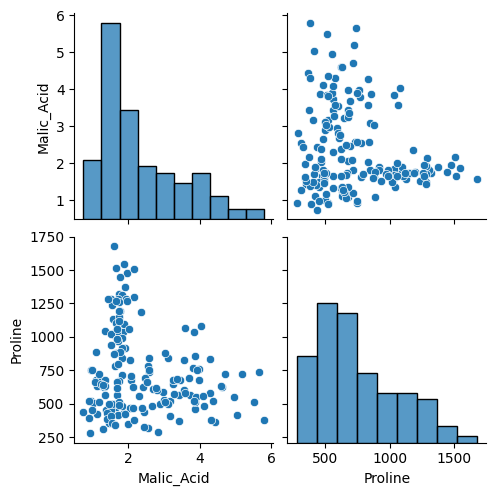

In [8]:
sn.pairplot(data[['Malic_Acid','Proline']])

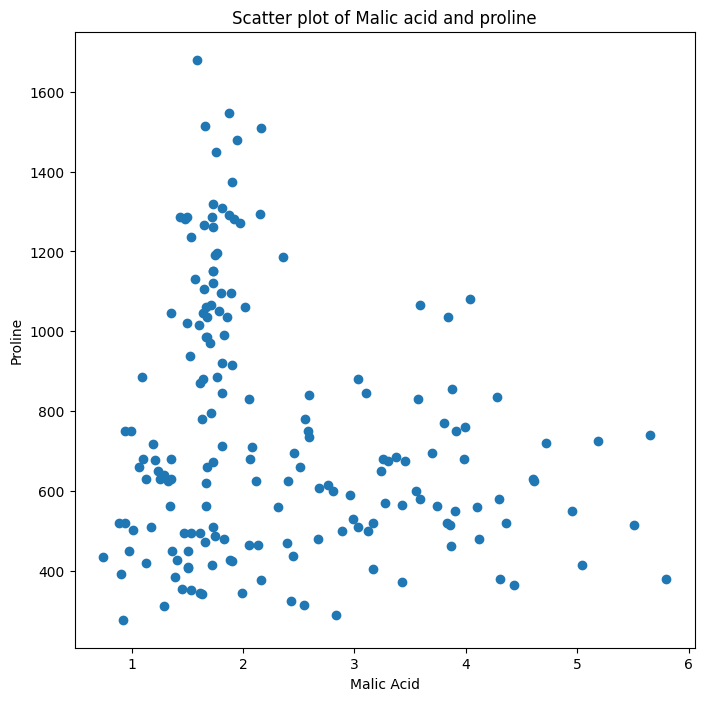

In [9]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot of Malic acid and proline')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.scatter(data.Malic_Acid,data.Proline)

In [10]:
from kneed import KneeLocator
from sklearn.cluster import KMeans

In [11]:
wcss = []
for k in range(1,15):
    km = KMeans(n_clusters = k)
    km.fit(data[['Malic_Acid','Proline']])
    wcss.append(km.inertia_)

In [12]:
wcss

[17552729.870636515,
 4508088.4704114115,
 2338061.928027069,
 1299080.398053024,
 886872.5048540451,
 617823.5760814524,
 381573.82059940184,
 292840.12012885674,
 241701.2733131848,
 188525.92528140737,
 156715.681743517,
 131171.5191518932,
 112833.92332291124,
 95753.24990399055]

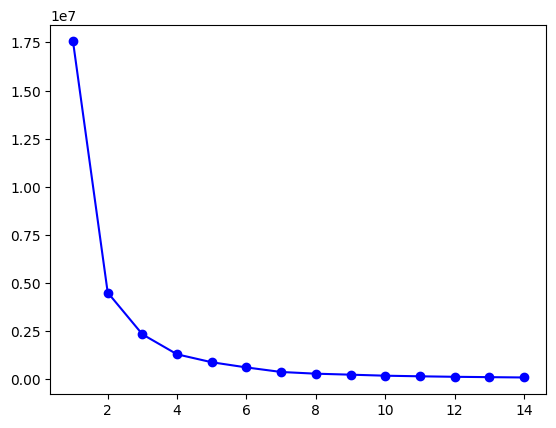

In [13]:
plt.plot(range(1,15),wcss,marker='o',color='b')

In [14]:
kn = KneeLocator(range(1,15), wcss, direction='decreasing', curve='convex')

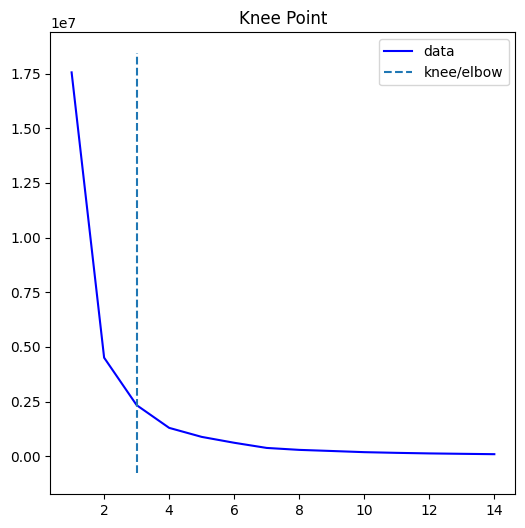

In [15]:
kn.plot_knee()

In [16]:
km2 = KMeans(n_clusters = 3)

In [17]:
km2.fit(data[['Malic_Acid','Proline']])

KMeans(n_clusters=3)

In [18]:
data['Clusters'] = km2.predict(data[['Malic_Acid','Proline']])

In [19]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [20]:
c_center = km2.cluster_centers_
data2 = data.copy()
data2 = data2[['Malic_Acid', 'Proline', 'Clusters']]
data0 = data2[data2['Clusters'] == 0]
data1 = data2[data2['Clusters'] == 1]
data2 = data2[data2['Clusters'] == 2]

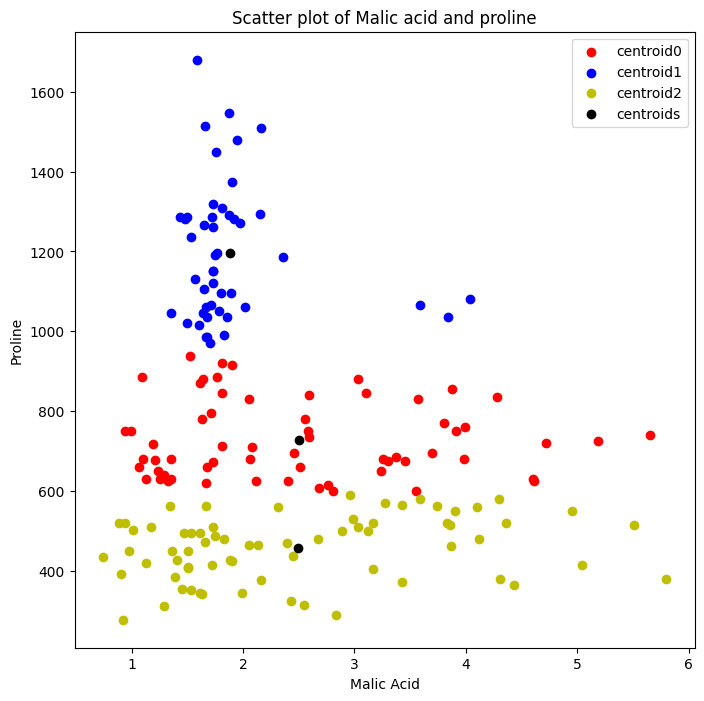

In [21]:
plt.figure(figsize=(8,8))
plt.title('Scatter plot of Malic acid and proline')
plt.xlabel('Malic Acid')
plt.ylabel('Proline')
plt.scatter(data0.Malic_Acid,data0.Proline,color='red',label='centroid0')
plt.scatter(data1.Malic_Acid,data1.Proline,color='blue',label='centroid1')
plt.scatter(data2.Malic_Acid,data2.Proline,color='y',label='centroid2')
plt.scatter(c_center[:,0] , c_center[:,1], color='black', label='centroids')
plt.legend()